In [1]:
import numpy as np
import pandas as pd
import optionprice
import math
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def BSM(S, sigma, r, dt):
    z = np.random.normal(0, dt)
    return S + S * r * dt + S * sigma * z

In [3]:
def BSM_payoff(S):
    global strike
    if S > strike:
        return S - strike
    return 0

In [4]:
def d_plus(s, sigma, T, t, r, strike): 
    return ((np.log(s / strike)) + (T - t) * (r + (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))

In [5]:
def d_minus(s, sigma, T, t, r, strike):
    return ((np.log(s / strike)) + (T - t) * (r - (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))

In [6]:
def price_call_option(s, sigma, T, t, r, strike):
    I_plus = norm.cdf(d_plus(s, sigma, T, t, r, strike))
    I_minus = norm.cdf(d_minus(s, sigma, T, t, r, strike))
    ans = s * I_plus - strike * np.exp(-1 * r * (T - t)) * I_minus
    return ans

In [7]:
# delta
def delta(s, sigma, T, t, r, strike):
    return norm.cdf(d_plus(s, sigma, T, t, r, strike))

In [8]:
S_0, r, sigma_year, T = 95, 0.06, 0.2, 1
strike, N = 102, 10 ** 4

period_counts = 13

In [9]:
spot = np.zeros((N, period_counts))
spot[:, 0] = S_0

for i in range(N):
    for t in range(0, period_counts):
        if t == 0:
            continue
        spot[i, t] = BSM(spot[i, t - 1], sigma_year / np.sqrt(12), r / 12, T)



print('average price of average prices:', np.mean(spot[:, -1]))

a = []
for i in range(N):
    a.append(BSM_payoff(spot[i, -1]))

'''
delta_arr = []
for t in tqdm(range(period_counts)):
    temp = []
    for i in range(1, N):
        temp.append(delta(spot[i, t], sigma_month, 2 * T, T , r, strike))
    delta_arr.append(np.mean(temp))
'''
print('EXPECTED OPTION REVERUE:', np.mean(a))
print('EXPECTED OPTION REVERUE %:', 100 * np.mean(a) / S_0, '%')
#print('AVG DELTA:', delta_arr)
print()

average price of average prices: 100.97111595319357
EXPECTED OPTION REVERUE: 7.570120133919804
EXPECTED OPTION REVERUE %: 7.968547509389268 %



In [10]:
spot = pd.DataFrame(spot)
spot

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,95.0,99.858799,91.795326,89.831365,89.508127,87.567426,87.521040,84.605468,84.297043,88.457607,85.854578,90.387112,92.784604
1,95.0,94.696056,93.485073,95.816069,95.351993,92.880373,88.773677,93.157941,89.257634,91.168137,100.514716,88.591079,88.977282
2,95.0,95.218549,94.261257,90.832374,98.243020,99.709179,90.553685,88.956130,85.185835,80.126908,73.466047,77.636055,79.294719
3,95.0,94.319055,88.878982,85.224874,87.682418,92.552444,99.864814,102.111658,98.538297,97.231975,94.399193,100.492978,94.948063
4,95.0,94.085186,101.693728,103.485593,110.653406,103.141049,97.634718,94.150411,91.896427,92.350673,97.665481,91.741172,88.101476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,95.0,100.783716,104.743469,113.756779,124.073829,138.544476,145.196203,142.548996,139.521243,131.049918,123.033282,126.384456,127.781715
9996,95.0,92.938767,87.647188,79.448773,77.209961,86.425527,95.468507,88.476355,86.236165,96.496671,100.494327,107.642223,100.516567
9997,95.0,96.254433,96.088646,97.383962,99.593791,104.771775,102.904608,114.300711,105.026675,96.797894,95.789768,89.396567,91.902634
9998,95.0,83.786205,88.957664,88.824823,89.832879,89.150313,88.219796,91.156777,86.823242,86.363121,81.193847,86.583254,86.977097


In [11]:
delta_arr = []
for i in tqdm(range(len(spot))):
    temp = []
    for t in range(period_counts):
        temp.append(delta(spot.iloc[i][t], sigma_year, T, t / 12, r, strike))
    delta_arr.append(temp)
delta_arr = pd.DataFrame(delta_arr)
delta_arr

  0%|          | 0/10000 [00:00<?, ?it/s]/tmp/ipykernel_16257/2679614286.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return ((np.log(s / strike)) + (T - t) * (r + (sigma ** 2) / 2)) / (sigma * np.sqrt(T - t))
100%|██████████| 10000/10000 [00:24<00:00, 404.18it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.517755,0.607257,0.415970,0.349360,0.317955,0.244073,0.211945,0.117005,0.077814,0.110383,0.025758,0.023960,0.0
1,0.517755,0.497985,0.455290,0.494144,0.465683,0.379176,0.242212,0.328457,0.177552,0.178089,0.493476,0.010017,0.0
2,0.517755,0.509448,0.473283,0.373322,0.538551,0.562299,0.288140,0.211370,0.091908,0.013428,0.000058,0.000002,0.0
3,0.517755,0.489675,0.348620,0.244792,0.274379,0.370397,0.553003,0.605140,0.472862,0.390225,0.216184,0.443404,0.0
4,0.517755,0.484506,0.636334,0.666363,0.795386,0.647408,0.489452,0.358642,0.250659,0.213656,0.356235,0.042668,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.517755,0.625639,0.695157,0.835527,0.936528,0.989561,0.997280,0.997820,0.998378,0.996596,0.993043,0.999935,1.0
9996,0.517755,0.459032,0.320790,0.136505,0.084022,0.217934,0.426577,0.199455,0.110670,0.361429,0.492485,0.852683,0.0
9997,0.517755,0.531958,0.515216,0.531496,0.571583,0.684752,0.635057,0.872889,0.685871,0.373168,0.272241,0.015044,0.0
9998,0.517755,0.259695,0.350414,0.325597,0.325906,0.282315,0.228601,0.270141,0.122169,0.071580,0.004260,0.003237,0.0


In [12]:
delta_pos = (delta_arr.T - delta_arr.T.shift(1)).fillna(delta_arr[0][0]).T
delta_pos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.517755,0.089501,-0.191286,-0.066610,-0.031406,-0.073881,-0.032129,-0.094940,-0.039191,0.032569,-0.084625,-0.001798,-0.023960
1,0.517755,-0.019770,-0.042695,0.038854,-0.028461,-0.086508,-0.136964,0.086245,-0.150905,0.000537,0.315387,-0.483459,-0.010017
2,0.517755,-0.008307,-0.036165,-0.099962,0.165229,0.023748,-0.274159,-0.076771,-0.119462,-0.078480,-0.013370,-0.000056,-0.000002
3,0.517755,-0.028080,-0.141056,-0.103827,0.029586,0.096019,0.182605,0.052137,-0.132278,-0.082637,-0.174041,0.227220,-0.443404
4,0.517755,-0.033250,0.151829,0.030029,0.129023,-0.147978,-0.157957,-0.130810,-0.107982,-0.037003,0.142578,-0.313567,-0.042668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.517755,0.107883,0.069518,0.140370,0.101000,0.053033,0.007719,0.000540,0.000558,-0.001783,-0.003553,0.006892,0.000065
9996,0.517755,-0.058723,-0.138242,-0.184285,-0.052483,0.133912,0.208643,-0.227122,-0.088785,0.250758,0.131056,0.360198,-0.852683
9997,0.517755,0.014202,-0.016742,0.016281,0.040087,0.113168,-0.049695,0.237832,-0.187018,-0.312703,-0.100926,-0.257198,-0.015044
9998,0.517755,-0.258060,0.090718,-0.024817,0.000308,-0.043591,-0.053714,0.041540,-0.147973,-0.050588,-0.067321,-0.001023,-0.003237


In [13]:
pos_buy = (delta_pos > 0).replace({True: 1, False: 0}) * delta_pos
pos_buy

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.517755,0.089501,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.032569,-0.000000,-0.000000,-0.000000
1,0.517755,-0.000000,-0.000000,0.038854,-0.000000,-0.000000,-0.000000,0.086245,-0.000000,0.000537,0.315387,-0.000000,-0.000000
2,0.517755,-0.000000,-0.000000,-0.000000,0.165229,0.023748,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,0.517755,-0.000000,-0.000000,-0.000000,0.029586,0.096019,0.182605,0.052137,-0.000000,-0.000000,-0.000000,0.227220,-0.000000
4,0.517755,-0.000000,0.151829,0.030029,0.129023,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.142578,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.517755,0.107883,0.069518,0.140370,0.101000,0.053033,0.007719,0.000540,0.000558,-0.000000,-0.000000,0.006892,0.000065
9996,0.517755,-0.000000,-0.000000,-0.000000,-0.000000,0.133912,0.208643,-0.000000,-0.000000,0.250758,0.131056,0.360198,-0.000000
9997,0.517755,0.014202,-0.000000,0.016281,0.040087,0.113168,-0.000000,0.237832,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
9998,0.517755,-0.000000,0.090718,-0.000000,0.000308,-0.000000,-0.000000,0.041540,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [14]:
avg_spot = (pos_buy * spot).cumsum(axis=1) / pos_buy.cumsum(axis=1)
avg_spot

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,95.0,95.716121,95.716121,95.716121,95.716121,95.716121,95.716121,95.716121,95.716121,95.346642,95.346642,95.346642,95.346642
1,95.0,95.000000,95.000000,95.056966,95.056966,95.056966,95.056966,94.802193,94.802193,94.799161,96.679275,96.679275,96.679275
2,95.0,95.000000,95.000000,95.000000,95.784559,95.916435,95.916435,95.916435,95.916435,95.916435,95.916435,95.916435,95.916435
3,95.0,95.000000,95.000000,95.000000,94.604450,94.298197,95.528871,95.919722,95.919722,95.919722,95.919722,96.859841,96.859841
4,95.0,95.000000,96.517807,96.816880,98.971302,98.971302,98.971302,98.971302,98.971302,98.971302,98.779602,98.779602,98.779602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,95.0,95.997327,96.871976,99.708660,102.336330,104.276824,104.593542,104.614092,104.633618,104.633618,104.633618,104.782749,104.784225
9996,95.0,95.000000,95.000000,95.000000,95.000000,93.238014,93.778955,93.778955,93.778955,94.392319,95.036139,97.869954,97.869954
9997,95.0,95.033491,95.033491,95.103292,95.409264,96.919668,96.919668,101.320449,101.320449,101.320449,101.320449,101.320449,101.320449
9998,95.0,95.000000,94.099137,94.099137,94.096976,94.096976,94.096976,93.909166,93.909166,93.909166,93.909166,93.909166,93.909166


In [15]:
pnl = ((delta_pos < 0).replace({True: -1, False: 0}) * delta_pos * (spot - avg_spot)).cumsum(axis=1)
pnl

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.000000,-0.749995,-1.141977,-1.336943,-1.938979,-2.202279,-3.257123,-3.704643,-3.704643,-4.507908,-4.516826,-4.578212
1,0.0,-0.006009,-0.070689,-0.070689,-0.062292,-0.250584,-1.111168,-1.111168,-1.947870,-1.947870,-1.947870,-5.858180,-5.935331
2,0.0,0.001816,-0.024901,-0.441503,-0.441503,-0.441503,-1.911747,-2.446093,-3.727990,-4.967154,-5.267317,-5.268336,-5.268369
3,0.0,-0.019121,-0.882525,-1.897451,-1.897451,-1.897451,-1.897451,-1.897451,-1.551072,-1.442631,-1.707266,-1.707266,-2.554955
4,0.0,-0.030417,-0.030417,-0.030417,-0.030417,0.586613,0.375491,-0.255131,-1.019093,-1.264075,-1.264075,-3.471092,-3.926706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047097,0.112464,0.112464,0.112464
9996,0.0,-0.121042,-1.137510,-4.003375,-4.937046,-4.937046,-4.937046,-6.141382,-6.811069,-6.811069,-6.811069,-6.811069,-4.554348
9997,0.0,0.000000,0.017665,0.017665,0.017665,0.017665,0.315085,0.315085,1.008217,-0.406000,-0.964190,-4.030987,-4.172665
9998,0.0,-2.893829,-2.893829,-3.024721,-3.024721,-3.240350,-3.556035,-3.556035,-4.604557,-4.986299,-5.842303,-5.849797,-5.872235


In [16]:
print('Траектории цены спота при положительном PnL:', (pnl[12] > 0).sum())
print('Траектории цены спота при отрицательном PnL:', (pnl[12] < 0).sum())

Траектории цены спота при положительном PnL: 2478
Траектории цены спота при отрицательном PnL: 7455


In [17]:
fin_result = avg_spot * delta_arr
print('Стоимость хеджирования:', ((fin_result[12] - fin_result[0] + pnl[12]).mean()))
print('Цена опциона по формуле Блэка-Шоулза:', price_call_option(S_0, sigma_year, T, 0, r, strike))
print('Цена полученная методом Монте-Карло:',np.mean(a))

Стоимость хеджирования: -6.659649646215957
Цена опциона по формуле Блэка-Шоулза: 7.091183530159533
Цена полученная методом Монте-Карло: 7.570120133919804


<AxesSubplot: >

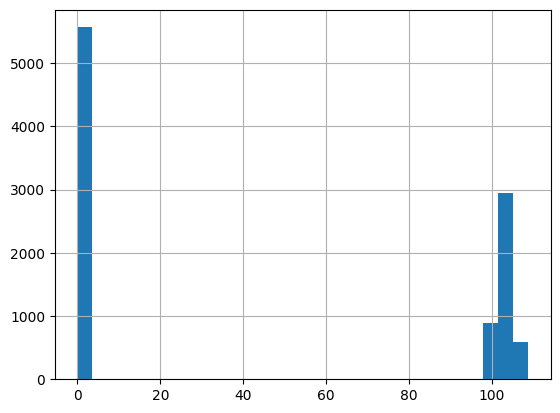

In [18]:
fin_result[12].hist(bins=30)